In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
%matplotlib inline

In [2]:
'''Load data'''
DATA_PATH = os.path.join('data', 'bach_air.wav')
sample_rate, data = wavfile.read(DATA_PATH, mmap=False)

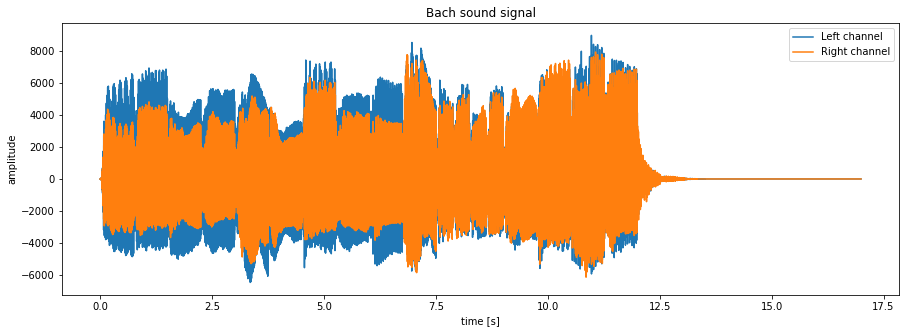

In [3]:
'''Inspect signal'''
time = np.linspace(0, data.shape[0]/sample_rate, data.shape[0])

plt.figure(figsize=(15,5))
plt.title('Bach sound signal')
plt.plot(time, data[:, 0], label='Left channel')
plt.plot(time, data[:, 1], label='Right channel')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.show()

In [ ]:
#https://dl.acm.org/doi/pdf/10.1109/TASLP.2016.2634118

# Matlab code translation

In [95]:
def get_window_length(forgetting_factor):
    return np.log(0.01) // np.log(forgetting_factor)

def PEARLS(
    signal, 
    forgetting_factor, 
    smoothness_factor, 
    max_num_harmonics, 
    sampling_frequency, 
    minimum_pitch, 
    maximum_pitch, 
    init_freq_resolution
):
    var = None
    signal_length = len(signal)
    
    # Number of samples for dictionary update
    num_samples_pitch = np.floor(45*1e-3*sampling_frequency)
    
    # Length of dictionary
    history_len = 2000
    
    # Penalty parameters
    penalty_factor_1 = 4
    penalty_factor_2 = 80
    
    # Gradient step-size
    step_size = 1e-4
    max_gradient_iterations = 20
    
    # Initialize frequency candidates
    frequency_candidates = np.arange(
        minimum_pitch, maximum_pitch, init_freq_resolution
    )
    num_freq_candidates = len(frequency_candidates)
    num_filter_coeffs = num_freq_candidates * max_num_harmonics
    
    # Define the frequency matrix
    frequency_matrix = np.arange(1, max_num_harmonics+1) * frequency_candidates.reshape((num_freq_candidates, 1))
    
    # Define history indicies
    t_history = np.arange(history_len).reshape(history_len, 1)
    
    # Define frequency matrix over time
    candidates_exponent = np.transpose(
        t_history * frequency_matrix.ravel()*2*np.pi/sampling_frequency
    )
    candidates_exponent_no_phase = candidates_exponent
    var = candidates_exponent
    
    # Candidates (defined as a(t)) over 45 ms in time
    candidates = np.exp(1j*candidates_exponent)
    
    # Define the window length
    window_length = get_window_length(forgetting_factor)
    print(window_length)
    
    filter_history = []
    candidate_frequency_history = []
    return filter_history, candidate_frequency_history, var

In [94]:
"""Test code"""
signal = data[:, 0]
forgetting_factor = 0.995
smoothness_factor = 1e4
max_num_harmonics = 10
sampling_frequency = sample_rate
minimum_pitch = 50
maximum_pitch = 500
initial_frequency_resolution = 5

filter_history, candidate_frequency_history, var = PEARLS(
    signal, 
    forgetting_factor, 
    smoothness_factor, 
    max_num_harmonics,
    sampling_frequency,
    minimum_pitch,
    maximum_pitch,
    initial_frequency_resolution
)

TypeError: return arrays must be of ArrayType

In [88]:
print(len(np.unique(var[:, 1])))
print(len(var[:, 1]))

482
900


In [38]:
lv = np.array([[1],[2],[3],[4],[5]])
lv2 = np.arange(1, 6).reshape(5, 1)
fv = np.array([[0.1, 0.2, 0.3]])

In [39]:
lv

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [40]:
lv2

array([[1],
       [2],
       [3],
       [4],
       [5]])